In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import pathlib
from utils import *

# Process results

In [3]:
data_path = pathlib.Path('/home/users/bjornmik/datasets/sweep_18/')

In [4]:
errors = compute_errors(data_path, target_weights=['weight<=0'])

  0%|          | 0/10 [00:00<?, ?it/s]

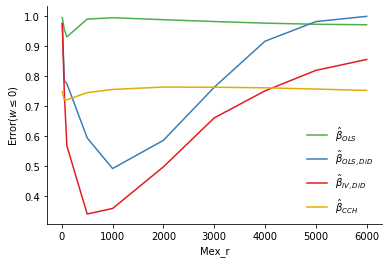

In [5]:
plot_errors(errors, 'mex_r', keys=['beta_ols', 'beta_ols_did', 'beta_iv_did', 'naive_cch'])

# Regression

In [6]:
samples = compute_all_samples(data_path)

  0%|          | 0/10 [00:00<?, ?it/s]

In [8]:
index = int(errors[list(errors.keys())[0]].query('mex_r==5000').index.values)
index

9

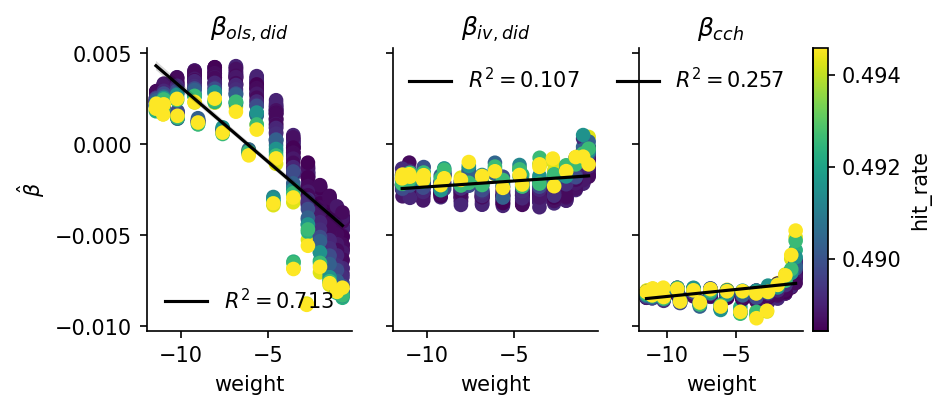

In [9]:
plot_regression(samples[index].query('weight<-0.5'), ['beta_ols_did','beta_iv_did', 'naive_cch'], rectify=False)

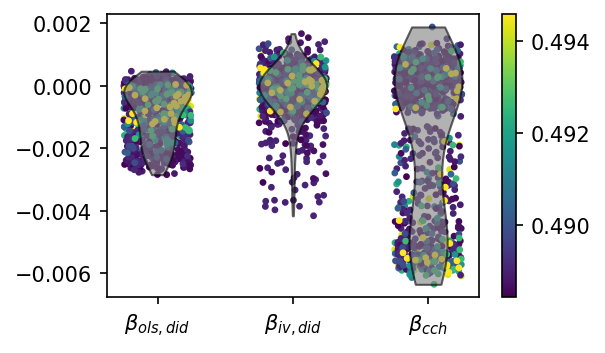

In [10]:
plot_false_positives(samples[index].query('weight>-0.001'), ['beta_ols_did', 'beta_iv_did', 'naive_cch'], rectify=False)

# Classification

In [ ]:
keys = ['beta_ols_did', 'beta_iv_did', 'beta_brew_did', 'naive_cch']

In [ ]:
auroc = []
for index, df in samples.items():
#     df = rectify_keys(df, keys)
    ser = df.iloc[0]
    for key in keys:
        a = roc_auc_score(df, key, threshold=0.01)
        score = {
            'mex_r': ser.mex_r,
            'group': key,
            'auroc': a
        }
        auroc.append(score)
auroc = pd.DataFrame(auroc)

In [ ]:
fig, ax = plt.subplots(1,1)
sns.lineplot(
    data=auroc,#.sort_values('n_neurons'),
    x="mex_r", y='auroc',
    hue="group",
    ax=ax
)
ax.set_ylabel('AUROC')
plt.tight_layout()

# Convergence

In [ ]:
error_convergence = compute_error_convergence(data_path, target_weights=['weight==0', 'weight<0'], threshold=0.00001)

In [ ]:
plot_error_convergence(error_convergence, index, ['beta_ols_did','beta_iv_did'])

# Convergence trials

In [ ]:
error_convergence_trials = compute_error_convergence_trials(data_path)

In [ ]:
fig, axs = plt.subplots(2, 8, sharex=True, sharey='row', figsize=(8,2.5), dpi=150)
for i, (mex_r, df) in enumerate(errors['positives'].groupby('mex_r')):
    index = int(df.index.values)
    plot_error_convergence_trials( 
        error_convergence_trials, 
        index, 
        keys=['error_beta_ols_did','error_beta_iv_did','error_beta_brew_did'], 
        axs=axs.T[i], legend=i==4, xlabels=(False,True), ylabels=[i==0]*2)
    axs[0,i].set_title(f'{mex_r:.0f}')

# Error difference

In [ ]:
error_trials = compute_error_trials(data_path, target_weights=['weight>=0'], threshold=0.00001)

In [ ]:
errors = compute_error_confidence(errors, error_trials)

In [ ]:
errors['weight<0'][['n_stim', 'error_ols_iv_did_pval', 'error_ols_iv_did_statistic']]

In [ ]:
plot_error_difference(errors, 'mex_r')